In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X= dataset.iloc[:,3:13]
y= dataset.iloc[:,13]
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
classifier = Sequential()

In [11]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [13]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [17]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_histroy = model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 6s 7ms/step - loss: 0.6078 - accuracy: 0.7018 - val_loss: 0.4940 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4817 - accuracy: 0.7930 - val_loss: 0.4590 - val_accuracy: 0.7993
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4410 - accuracy: 0.8138 - val_loss: 0.4434 - val_accuracy: 0.8058
Epoch 4/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4410 - accuracy: 0.8036 - val_loss: 0.4357 - val_accuracy: 0.8092
Epoch 5/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4244 - accuracy: 0.8184 - val_loss: 0.4319 - val_accuracy: 0.8099
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4266 - accuracy: 0.8137 - val_loss: 0.4284 - val_accuracy: 0.8114
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4110 - accuracy: 0.8249 - val_loss: 0.4217 - val_accuracy: 0.8171

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3310 - accuracy: 0.8621 - val_loss: 0.3637 - val_accuracy: 0.8569
Epoch 59/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3372 - accuracy: 0.8588 - val_loss: 0.3632 - val_accuracy: 0.8542
Epoch 60/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3323 - accuracy: 0.8550 - val_loss: 0.3646 - val_accuracy: 0.8538
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3164 - accuracy: 0.8689 - val_loss: 0.3644 - val_accuracy: 0.8516
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3189 - accuracy: 0.8667 - val_loss: 0.3631 - val_accuracy: 0.8542
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3136 - accuracy: 0.8691 - val_loss: 0.3626 - val_accuracy: 0.8542
Epoch 64/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3149 - accuracy: 0.8703 - val_loss: 0.3645 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


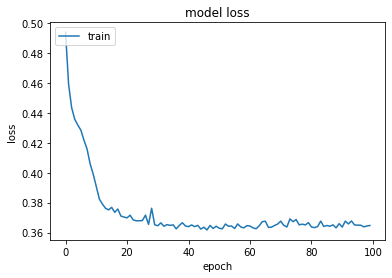

In [18]:
print(model_history.history.keys())
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[1509,   86],
       [ 199,  206]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score*100)

85.75
